In [4]:
#installing all dependencies 


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Load dataset
data = pd.read_csv('IMDB Dataset.csv')

# Display the first few rows
data.head()
print(len(data))

50000


The median of words and characters is being showed in the form of object 
=========== words ==========
Mean:231.15694
Mode:173.0
Min:4
Max:2470

=========== Characters ==========
Mean:1309.43102
Mode:970.0
Min:32
Max:13704

positive_reviews_sentiments 25000
negative_reviews_sentiments 25000


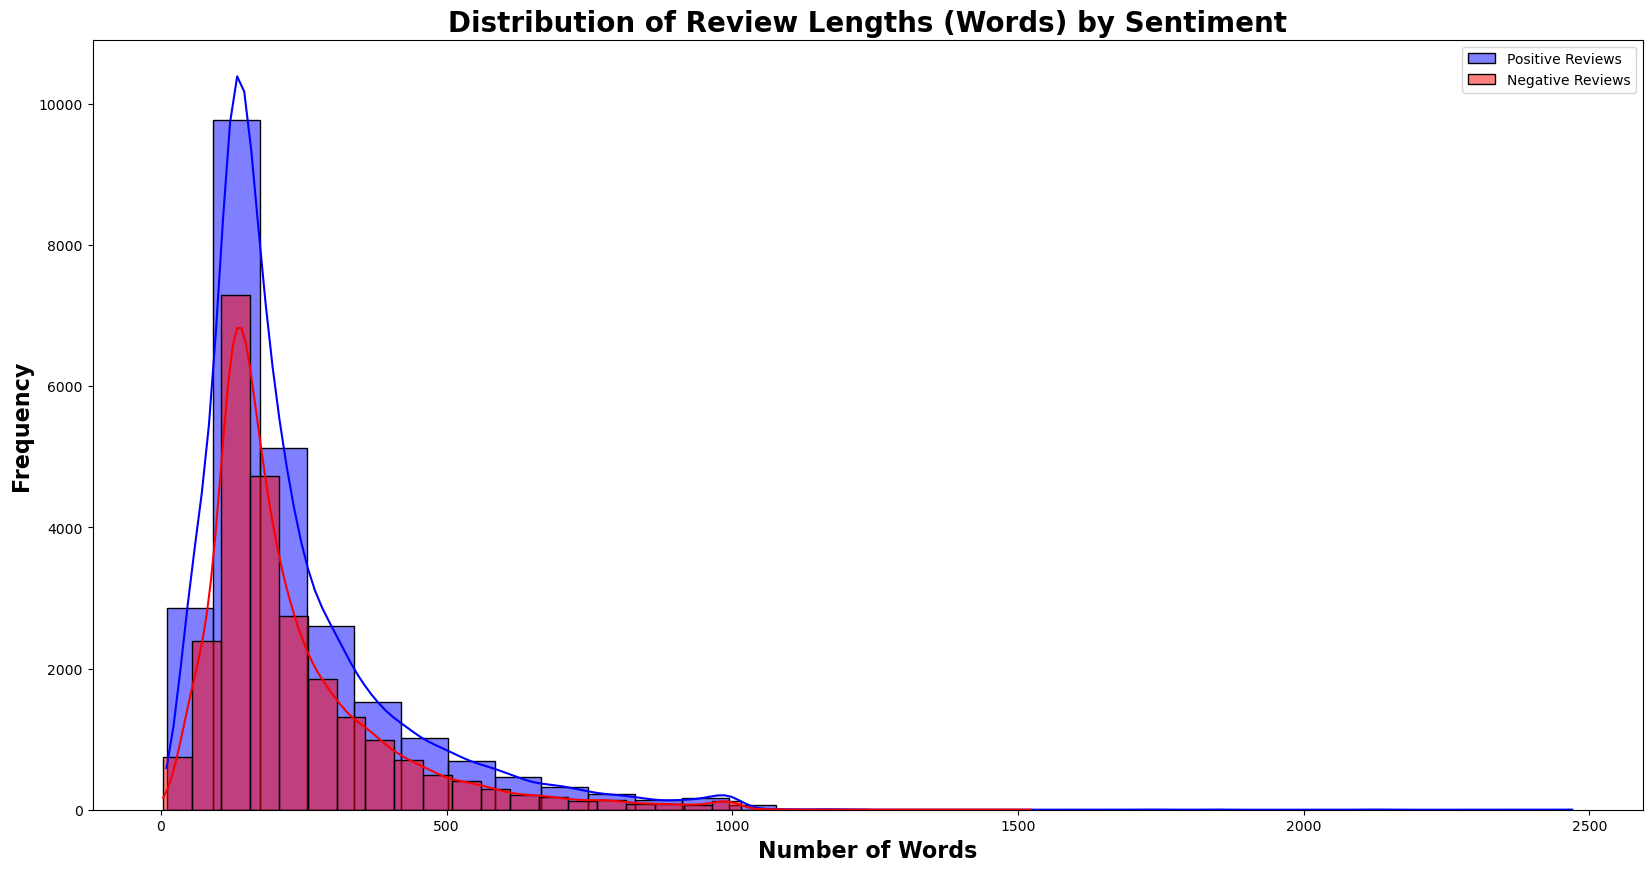

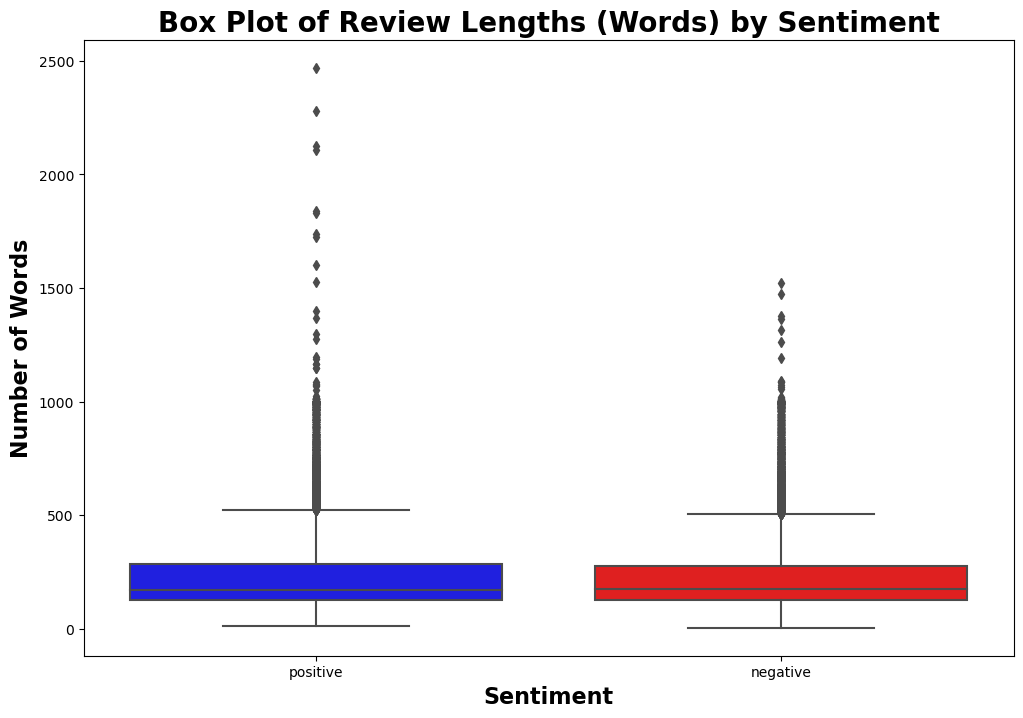

In [6]:
#==================================== Data Exploration ============================================

# ===================================== step 1 =======================================================

# Calculating the length of each review by words and characters
data['review_length_words'] = data['review'].apply(lambda x: len(x.split()))

# words counting
data['review_length_chars'] = data['review'].apply(len)


#print(data['review_length_words'])
#print(data['review_length_chars'])


# calculating the basic statistics mean, median, min, max
length_stats = {
    'Mean_words': data['review_length_words'].mean(),
    'Median_words': data['review_length_words'].median(),
    'Min_words': data['review_length_words'].min(),
    'Max_words': data['review_length_words'].max(),
    'Mean_chars': data['review_length_chars'].mean(),
    'Median_chars': data['review_length_chars'].median(),
    'Min_chars': data['review_length_chars'].min(),
    'Max_chars': data['review_length_chars'].max()
}


# Displaying the statistics

print('The median of words and characters is being showed in the form of object \n'+
      '=========== words ==========\n'+
      'Mean:'+str(length_stats['Mean_words']) +'\n'+
      'Mode:'+str(length_stats['Median_words']) +'\n'+
      'Min:'+str(length_stats['Min_words']) +'\n'+
      'Max:'+str(length_stats['Max_words']) +'\n\n'+
      '=========== Characters ==========\n'+
      'Mean:'+str(length_stats['Mean_chars']) +'\n'+
      'Mode:'+str(length_stats['Median_chars']) +'\n'+
      'Min:'+str(length_stats['Min_chars']) +'\n'+
      'Max:'+str(length_stats['Max_chars']) +'\n')



# ==================================== Visualization Reviews length =================== 

#calculating the reviews based on sentiments


positive_reviews_sentiments=(data[data['sentiment'] == 'positive'])
negative_reviews_sentiments=(data[data['sentiment'] == 'negative'])


print('positive_reviews_sentiments', len(positive_reviews_sentiments))
print('negative_reviews_sentiments', len(negative_reviews_sentiments))

plt.figure(figsize=(20, 10))

# Histogram for review length by words (positive and negative)
sns.histplot(data[data['sentiment'] == 'positive']['review_length_words'], color='blue', label='Positive Reviews', kde=True, bins=30)
sns.histplot(data[data['sentiment'] == 'negative']['review_length_words'], color='red', label='Negative Reviews', kde=True, bins=30)
plt.title('Distribution of Review Lengths (Words) by Sentiment', fontsize=20, fontweight='bold')
plt.xlabel('Number of Words', fontsize=16, fontweight='bold')
plt.ylabel('Frequency', fontsize=16, fontweight='bold')
plt.legend()
plt.show()





plt.figure(figsize=(12, 8))

# Box plot for review length by words
sns.boxplot(data=data, x='sentiment', y='review_length_words', palette={'positive': 'blue', 'negative': 'red'})
plt.title('Box Plot of Review Lengths (Words) by Sentiment', fontsize=20, fontweight='bold')
plt.xlabel('Sentiment', fontsize=16, fontweight='bold')
plt.ylabel('Number of Words', fontsize=16, fontweight='bold')
plt.show()













In [7]:
#==================================== Data Cleaning ============================================

# ===================================== step 2 =================================================

In [8]:
#Downloading the required library
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [48]:
# importing the required libraries and methods

import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

# Downloading NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')



# extra libraries
import string



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\haseebu24\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\haseebu24\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\haseebu24\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\haseebu24\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [41]:
#============================ loweringcase of text =====================================
#             ======== vairbale name is clean_review ===================

data['cleaned_review'] = data['review'].str.lower()

#============================ Removing Punctuation e.g. (.,;?!><) ===========================

data['cleaned_review'] = data['cleaned_review'].str.replace(f"[{string.punctuation}]", "", regex=True)

# print(data['cleaned_review'])

# ========================== removing special charaters from string e.g. (#, $, @) =========================

data['cleaned_review'] = data['cleaned_review'].str.replace(r"[^a-zA-Z\s]", "", regex=True)

# print(data['cleaned_review'])



In [42]:
#===========================  Tokenization of text =================================== 

from nltk.tokenize import word_tokenize
def word_tokenize_with_exception(review):
    try:
        return word_tokenize(review)
    except Exception as e:
        print(f"Error tokenizing review: {e}")
        return []

data['cleaned_review_data_tokens'] = data['cleaned_review'].apply(word_tokenize_with_exception)



SyntaxError: invalid syntax (418542620.py, line 1)

In [47]:
#========================== Removing the stop words from tokenized lists ==================================


stop_words = set(stopwords.words('english'))
data['cleaned_review_data_stopWords'] = data['cleaned_review_data_tokens'].apply(lambda x: [word for word in x if word not in stop_words])
print(data['cleaned_review_data_stopWords'],data['cleaned_review_data_stopWords'])

0        [one, reviewers, mentioned, watching, oz, epis...
1        [wonderful, little, production, br, br, filmin...
2        [thought, wonderful, way, spend, time, hot, su...
3        [basically, theres, family, little, boy, jake,...
4        [petter, matteis, love, time, money, visually,...
                               ...                        
49995    [thought, movie, right, good, job, wasnt, crea...
49996    [bad, plot, bad, dialogue, bad, acting, idioti...
49997    [catholic, taught, parochial, elementary, scho...
49998    [im, going, disagree, previous, comment, side,...
49999    [one, expects, star, trek, movies, high, art, ...
Name: cleaned_review_data_stopWords, Length: 50000, dtype: object 0        [one, reviewers, mentioned, watching, oz, epis...
1        [wonderful, little, production, br, br, filmin...
2        [thought, wonderful, way, spend, time, hot, su...
3        [basically, theres, family, little, boy, jake,...
4        [petter, matteis, love, time, money, vis

In [50]:

stemmer = PorterStemmer()
data['cleaned_review_data_stemmed_data'] = data['cleaned_review_data_stopWords'].apply(lambda x: [stemmer.stem(word) for word in x])


In [51]:
print(data['cleaned_review_data_stemmed_data'])

0        [one, review, mention, watch, oz, episod, youl...
1        [wonder, littl, product, br, br, film, techniq...
2        [thought, wonder, way, spend, time, hot, summe...
3        [basic, there, famili, littl, boy, jake, think...
4        [petter, mattei, love, time, money, visual, st...
                               ...                        
49995    [thought, movi, right, good, job, wasnt, creat...
49996    [bad, plot, bad, dialogu, bad, act, idiot, dir...
49997    [cathol, taught, parochi, elementari, school, ...
49998    [im, go, disagre, previou, comment, side, malt...
49999    [one, expect, star, trek, movi, high, art, fan...
Name: cleaned_review_data_stemmed_data, Length: 50000, dtype: object
